In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Baseline data
## Distribution of participants in experimental groups

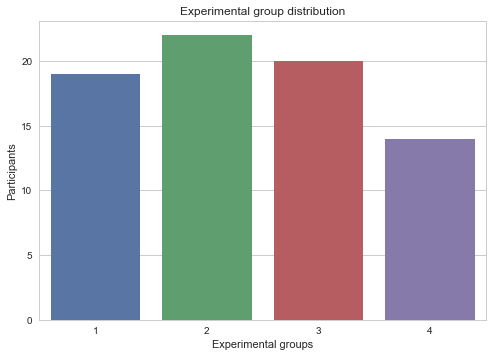

In [3]:
df = df.dropna()
sns.set_style("whitegrid")

# Distribution of participants in groups that finished the baseline survey.
group_distribution = df.controlGroup.value_counts()
ax = sns.barplot(group_distribution.index, y=group_distribution)
ax.set(xlabel='Experimental groups', ylabel='Participants', title='Experimental group distribution')

## Age and gender distribution of participants

In [4]:
male_age = df.loc[df['baselineD_sex'] == 'man', 'baselineD_age']
female_age = df.loc[df['baselineD_sex'] == 'vrouw', 'baselineD_age']

print 'Number of males:', (df.baselineD_sex == 'man').sum()
print 'Number of females:', (df.baselineD_sex == 'vrouw').sum()
print
print 'Average age males:', np.mean(male_age)
print 'Average age females:', np.mean(female_age)
print
print 'Min age males:', np.min(male_age)
print 'Max age males:', np.max(male_age)
print
print 'Min age females:', np.min(female_age)
print 'Max age females:', np.max(female_age)
print
print 'Average age total participants:', np.mean(df['baselineD_age'])
print
print 'Min age total participants:', np.min(df['baselineD_age'])
print 'Max age total participants:', np.max(df['baselineD_age'])

Number of males: 26
Number of females: 49

Average age males: 26.7307692308
Average age females: 25.306122449

Min age males: 16.0
Max age males: 49.0

Min age females: 16.0
Max age females: 56.0

Average age total participants: 25.8

Min age total participants: 16.0
Max age total participants: 56.0


## Education and work/study place

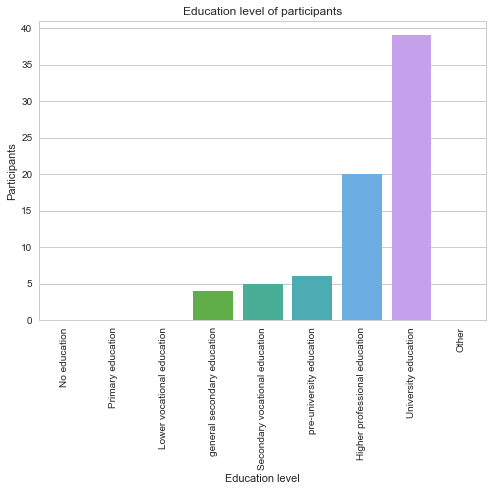

In [5]:
freq_education = df.baselineD_education.value_counts()
xvalues = dict(freq_education)
xvalues[1.0] = 0
xvalues[2.0] = 0
xvalues[3.0] = 0
xvalues[9.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Education level', ylabel='Participants', title='Education level of participants')
ax.set_xticklabels(['No education','Primary education', 
                    'Lower vocational education', 'general secondary education', 'Secondary vocational education',
                   'pre-university education', 'Higher professional education', 'University education',
                   'Other'], rotation=90)


4.0    43
1.0    30
3.0     2
Name: baselineD_location, dtype: int64


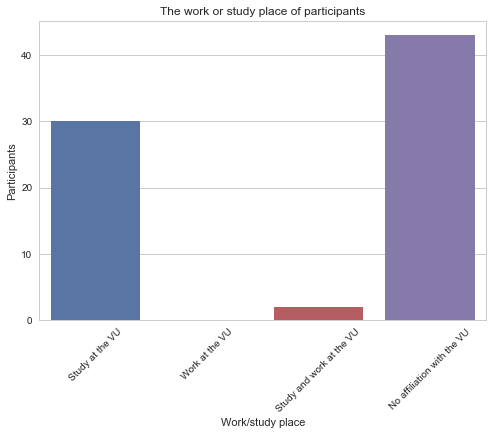

In [115]:
freq_location = df.baselineD_location.value_counts()
print freq_location
xvalues = dict(freq_location)
xvalues[2.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Work/study place', ylabel='Participants', title='The work or study place of participants')
ax.set_xticklabels(['Study at the VU', 'Work at the VU', 'Study and work at the VU', 
                    'No affiliation with the VU'], rotation=45)

## Snacking behavior before experiment

/Users/Rukshar/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


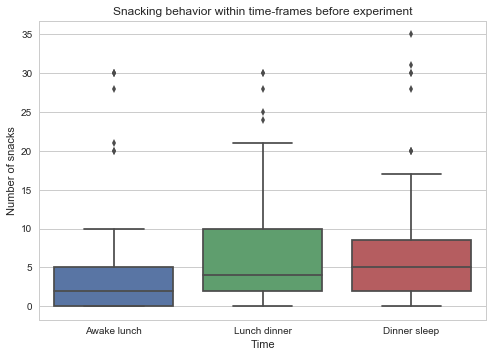

In [7]:
ax = sns.boxplot(x=df[['baselineA_awake_lunch', 'baselineA_lunch_diner', 'baselineA_diner_sleep']])
ax.set(xlabel='Time', ylabel='Number of snacks', title='Snacking behavior within time-frames before experiment')
ax.set_xticklabels(['Awake lunch', 'Lunch dinner', 'Dinner sleep'])

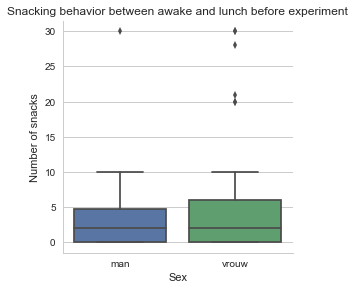

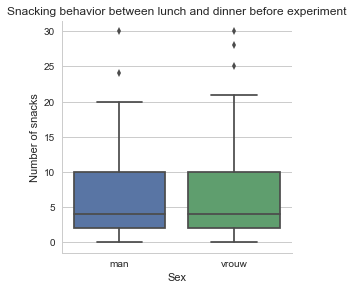

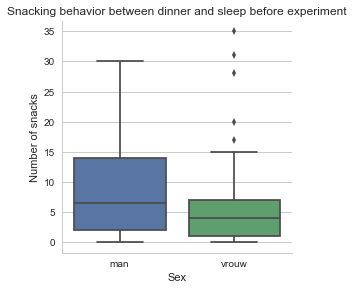

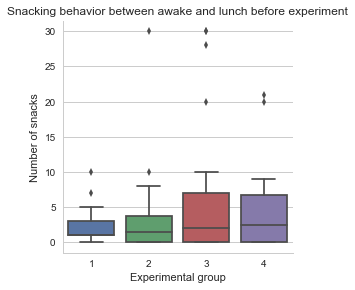

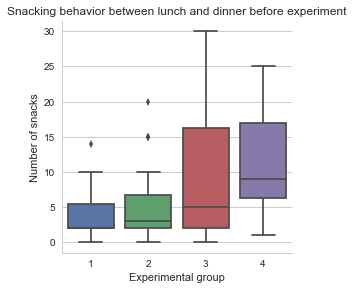

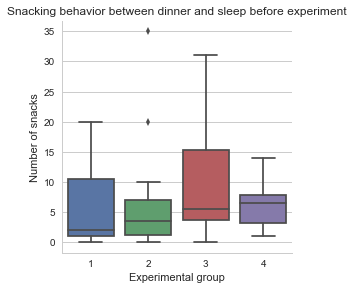

In [8]:
# Sex
g = sns.factorplot(x='baselineD_sex', y='baselineA_awake_lunch', data=df, kind="box")
g.set(xlabel='Sex', ylabel='Number of snacks', title='Snacking behavior between awake and lunch before experiment')

g = sns.factorplot(x='baselineD_sex', y='baselineA_lunch_diner', data=df, kind="box")
g.set(xlabel='Sex', ylabel='Number of snacks', title='Snacking behavior between lunch and dinner before experiment')

g = sns.factorplot(x='baselineD_sex', y='baselineA_diner_sleep', data=df, kind="box")
g.set(xlabel='Sex', ylabel='Number of snacks', title='Snacking behavior between dinner and sleep before experiment')

# Controlgroup
g = sns.factorplot(x='controlGroup', y='baselineA_awake_lunch', data=df, kind="box")
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between awake and lunch before experiment')

g = sns.factorplot(x='controlGroup', y='baselineA_lunch_diner', data=df, kind="box")
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between lunch and dinner before experiment')

g = sns.factorplot(x='controlGroup', y='baselineA_diner_sleep', data=df, kind="box")
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between dinner and sleep before experiment')

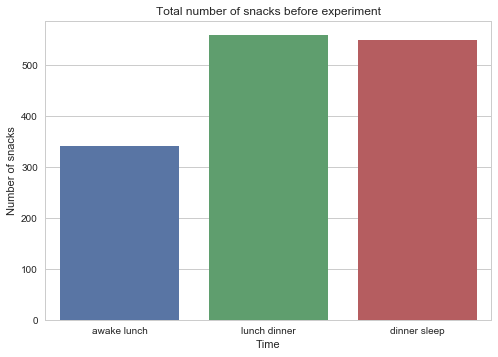

In [9]:
total_snacks_awakelunch = np.sum(df['baselineA_awake_lunch'])
total_snacks_lunchdinner = np.sum(df['baselineA_lunch_diner'])
total_snacks_dinnersleep = np.sum(df['baselineA_diner_sleep'])
y = [total_snacks_awakelunch, total_snacks_lunchdinner, total_snacks_dinnersleep]
ax = sns.barplot(x=['awake lunch', 'lunch dinner', 'dinner sleep'], y=y)
ax.set(xlabel='Time', ylabel='Number of snacks', title='Total number of snacks before experiment')

## Tailored VS. random messages

[<matplotlib.text.Text at 0x117f9d750>, <matplotlib.text.Text at 0x117fa9350>]

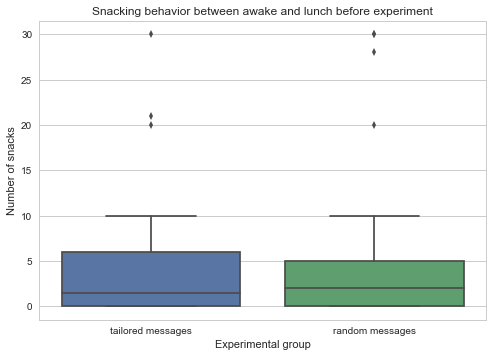

In [10]:
group1 = df.query('controlGroup == 1')
group2 = df.query('controlGroup == 2')
group3 = df.query('controlGroup == 3')
group4 = df.query('controlGroup == 4')

gt_awake = pd.concat([group2[['baselineA_awake_lunch']], group4[['baselineA_awake_lunch']]])
gr_awake = pd.concat([group1[['baselineA_awake_lunch']], group3[['baselineA_awake_lunch']]])
gt_lunch = pd.concat([group2[['baselineA_lunch_diner']], group4[['baselineA_lunch_diner']]])
gr_lunch = pd.concat([group1[['baselineA_lunch_diner']], group3[['baselineA_lunch_diner']]])
gt_dinner = pd.concat([group2[['baselineA_diner_sleep']], group4[['baselineA_diner_sleep']]])
gr_dinner = pd.concat([group1[['baselineA_diner_sleep']], group3[['baselineA_diner_sleep']]])


g = sns.boxplot(data=[gt_awake['baselineA_awake_lunch'], gr_awake['baselineA_awake_lunch']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between awake and lunch before experiment')
g.set_xticklabels(["tailored messages", "random messages"])

[<matplotlib.text.Text at 0x117fb3810>, <matplotlib.text.Text at 0x11805d490>]

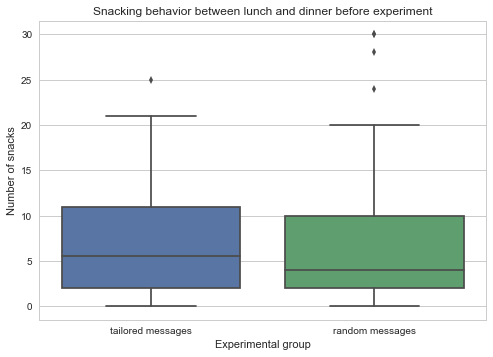

In [11]:
g = sns.boxplot(data=[gt_lunch['baselineA_lunch_diner'], gr_lunch['baselineA_lunch_diner']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between lunch and dinner before experiment')
g.set_xticklabels(["tailored messages", "random messages"])

[<matplotlib.text.Text at 0x1181b1650>, <matplotlib.text.Text at 0x117968590>]

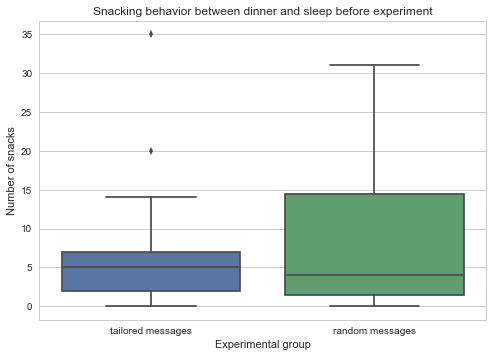

In [12]:
g = sns.boxplot(data=[gt_dinner['baselineA_diner_sleep'], gr_dinner['baselineA_diner_sleep']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between dinner and sleep before experiment')
g.set_xticklabels(["tailored messages", "random messages"])

## Specific VS. random time/location

[<matplotlib.text.Text at 0x1175a2f10>, <matplotlib.text.Text at 0x1177c8d10>]

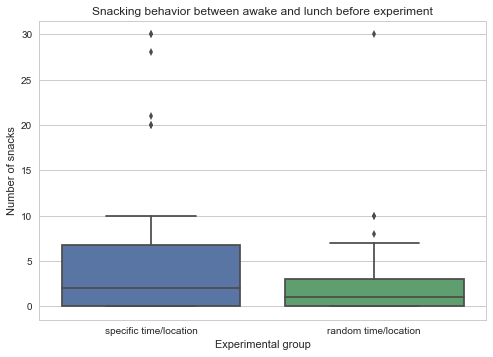

In [13]:
gstl_awake = pd.concat([group3[['baselineA_awake_lunch']], group4[['baselineA_awake_lunch']]])
grtl_awake = pd.concat([group1[['baselineA_awake_lunch']], group2[['baselineA_awake_lunch']]])
gstl_lunch = pd.concat([group3[['baselineA_lunch_diner']], group4[['baselineA_lunch_diner']]])
grtl_lunch = pd.concat([group1[['baselineA_lunch_diner']], group2[['baselineA_lunch_diner']]])
gstl_dinner = pd.concat([group3[['baselineA_diner_sleep']], group4[['baselineA_diner_sleep']]])
grtl_dinner = pd.concat([group1[['baselineA_diner_sleep']], group2[['baselineA_diner_sleep']]])

g = sns.boxplot(data=[gstl_awake['baselineA_awake_lunch'], grtl_awake['baselineA_awake_lunch']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between awake and lunch before experiment')
g.set_xticklabels(["specific time/location", "random time/location"])

[<matplotlib.text.Text at 0x1177c8b50>, <matplotlib.text.Text at 0x117b14a50>]

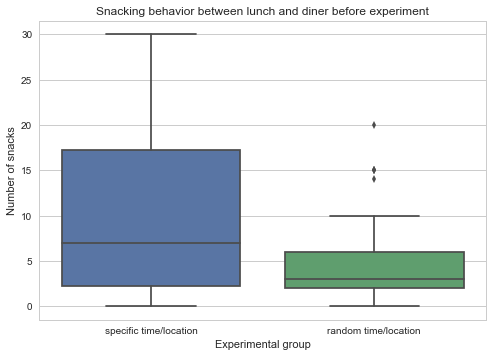

In [14]:
g = sns.boxplot(data=[gstl_lunch['baselineA_lunch_diner'], grtl_lunch['baselineA_lunch_diner']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between lunch and diner before experiment')
g.set_xticklabels(["specific time/location", "random time/location"])

[<matplotlib.text.Text at 0x117319250>, <matplotlib.text.Text at 0x11764b890>]

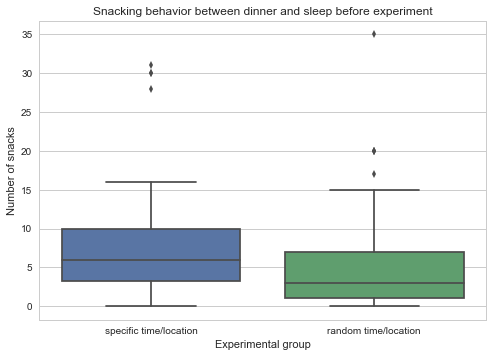

In [15]:
g = sns.boxplot(data=[gstl_dinner['baselineA_diner_sleep'], grtl_dinner['baselineA_diner_sleep']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between dinner and sleep before experiment')
g.set_xticklabels(["specific time/location", "random time/location"])

## Intention of participants towards snacking behavior

Mean intentions1: 3.85333333333
Standard deviation intentions1: 1.28263617427


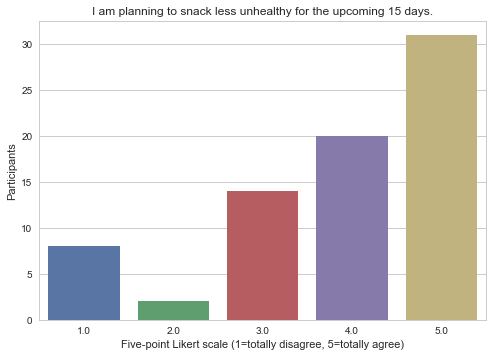

In [16]:
print 'Mean intentions1:', np.mean(df['baselineB_intentions1'])
print 'Standard deviation intentions1:', np.std(df['baselineB_intentions1'])

freq_intentions1 = df.baselineB_intentions1.value_counts()
ax = sns.barplot(x=freq_intentions1.index, y=freq_intentions1)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=totally agree)', ylabel='Participants', title='I am planning to snack less unhealthy for the upcoming 15 days.')

Mean intentions2: 4.01333333333
Standard deviation intentions2: 1.20546901891


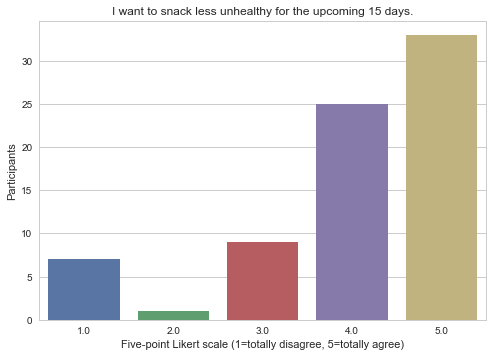

In [17]:
print 'Mean intentions2:', np.mean(df['baselineB_intentions2'])
print 'Standard deviation intentions2:', np.std(df['baselineB_intentions2'])

freq_intentions2 = df.baselineB_intentions2.value_counts()
ax = sns.barplot(x=freq_intentions2.index, y=freq_intentions2)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=totally agree)', ylabel='Participants', title='I want to snack less unhealthy for the upcoming 15 days.')

Mean intentions3: 3.88
Standard deviation intentions3: 1.27499019604


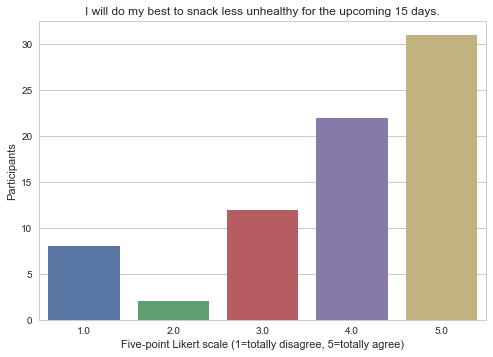

In [18]:
print 'Mean intentions3:', np.mean(df['baselineB_intentions3'])
print 'Standard deviation intentions3:', np.std(df['baselineB_intentions3'])

freq_intentions3 = df.baselineB_intentions3.value_counts()
ax = sns.barplot(x=freq_intentions3.index, y=freq_intentions3)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=totally agree)', ylabel='Participants', title='I will do my best to snack less unhealthy for the upcoming 15 days.')

Mean intentions4: 4.02666666667
Standard deviation intentions4: 1.19970366711


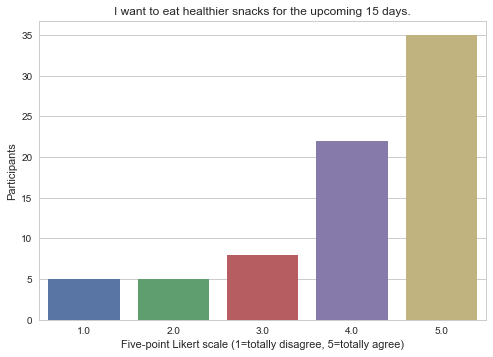

In [19]:
print 'Mean intentions4:', np.mean(df['baselineB_intentions4'])
print 'Standard deviation intentions4:', np.std(df['baselineB_intentions4'])

freq_intentions4 = df.baselineB_intentions4.value_counts()
ax = sns.barplot(x=freq_intentions4.index, y=freq_intentions4)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=totally agree)', ylabel='Participants', title='I want to eat healthier snacks for the upcoming 15 days.')

## Importance and success of participants

Mean importance1: 4.14666666667
Standard deviation importance1: 0.724676172891


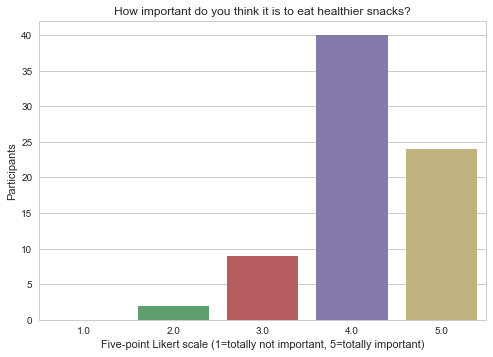

In [20]:
print 'Mean importance1:', np.mean(df['baselineC_importance1'])
print 'Standard deviation importance1:', np.std(df['baselineC_importance1'])

freq_importance1 = df.baselineC_importance1.value_counts()
xvalues = dict(freq_importance1)
xvalues[1.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Five-point Likert scale (1=totally not important, 5=totally important)', ylabel='Participants', title='How important do you think it is to eat healthier snacks?')

Mean importance2: 4.21333333333
Standard deviation importance2: 0.753539794717


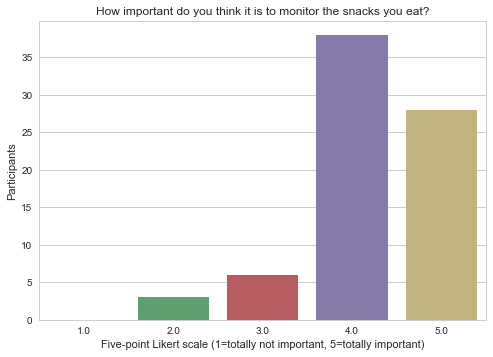

In [21]:
print 'Mean importance2:', np.mean(df['baselineC_importance2'])
print 'Standard deviation importance2:', np.std(df['baselineC_importance2'])

freq_importance2 = df.baselineC_importance2.value_counts()
xvalues = dict(freq_importance2)
xvalues[1.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Five-point Likert scale (1=totally not important, 5=totally important)', ylabel='Participants', title='How important do you think it is to monitor the snacks you eat?')

Mean success1: 2.86666666667
Standard deviation success1: 1.04986771653


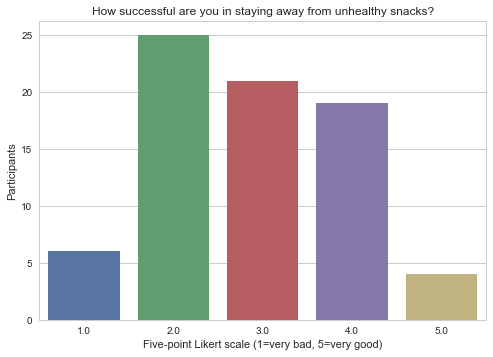

In [22]:
print 'Mean success1:', np.mean(df['baselineC_success1'])
print 'Standard deviation success1:', np.std(df['baselineC_success1'])

freq_success1 = df.baselineC_success1.value_counts()
ax = sns.barplot(x=freq_success1.index, y=freq_success1)
ax.set(xlabel='Five-point Likert scale (1=very bad, 5=very good)', ylabel='Participants', title='How successful are you in staying away from unhealthy snacks?')

Mean success2: 3.32
Standard deviation success2: 1.1680182647


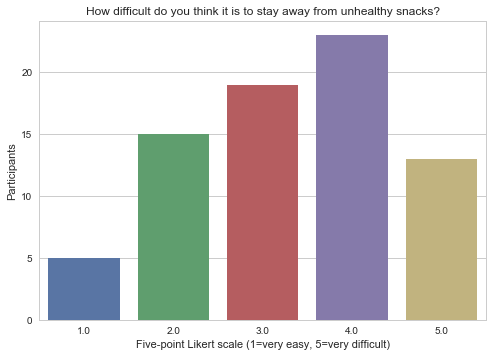

In [23]:
print 'Mean success2:', np.mean(df['baselineC_success2'])
print 'Standard deviation success2:', np.std(df['baselineC_success2'])

freq_success2 = df.baselineC_success2.value_counts()
ax = sns.barplot(x=freq_success2.index, y=freq_success2)
ax.set(xlabel='Five-point Likert scale (1=very easy, 5=very difficult)', ylabel='Participants', title='How difficult do you think it is to stay away from unhealthy snacks?')

## Personality of the participants

Mean personality1: 3.09333333333
Standard deviation personality1: 1.22390994585


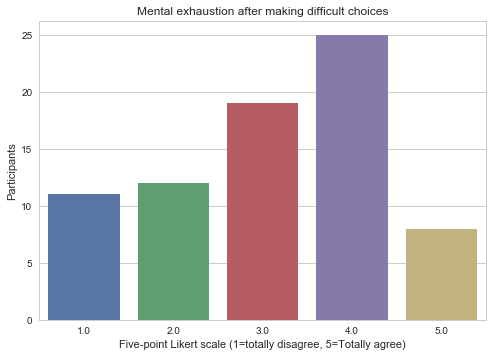

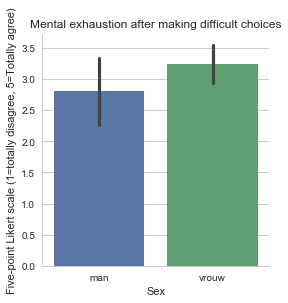

In [24]:
print 'Mean personality1:', np.mean(df['baselineE_personality1'])
print 'Standard deviation personality1:', np.std(df['baselineE_personality1'])

freq_personality1 = df.baselineE_personality1.value_counts()
ax = sns.barplot(x=freq_personality1.index, y=freq_personality1)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Mental exhaustion after making difficult choices')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality1', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Mental exhaustion after making difficult choices')

Mean personality2: 2.96
Standard deviation personality2: 1.08860767344


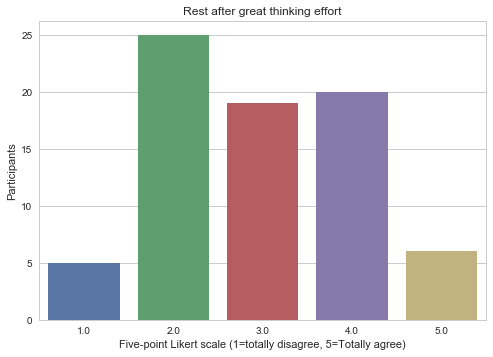

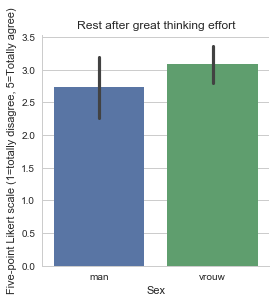

In [25]:
print 'Mean personality2:', np.mean(df['baselineE_personality2'])
print 'Standard deviation personality2:', np.std(df['baselineE_personality2'])

freq_personality2 = df.baselineE_personality2.value_counts()
ax = sns.barplot(x=freq_personality2.index, y=freq_personality2)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Rest after great thinking effort')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality2', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Rest after great thinking effort')

Mean personality3: 2.8
Standard deviation personality3: 1.1430952133


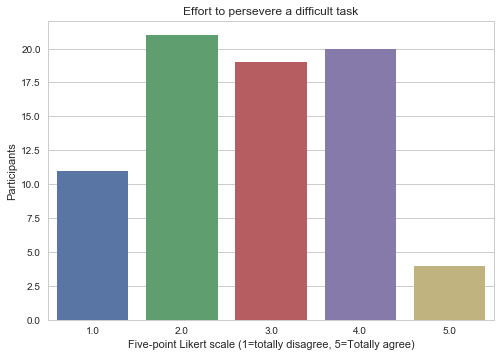

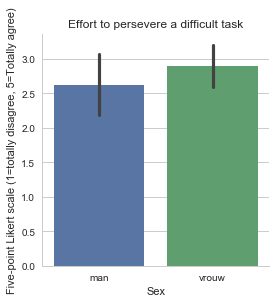

In [26]:
print 'Mean personality3:', np.mean(df['baselineE_personality3'])
print 'Standard deviation personality3:', np.std(df['baselineE_personality3'])

freq_personality3 = df.baselineE_personality3.value_counts()
ax = sns.barplot(x=freq_personality3.index, y=freq_personality3)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Effort to persevere a difficult task')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality3', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Effort to persevere a difficult task')

Mean personality4: 3.17333333333
Standard deviation personality4: 1.24764667363


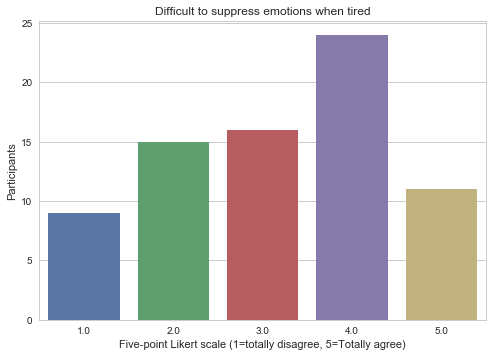

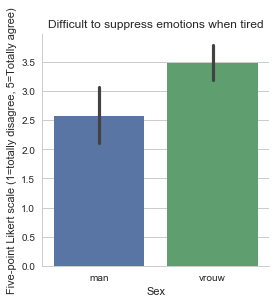

In [27]:
print 'Mean personality4:', np.mean(df['baselineE_personality4'])
print 'Standard deviation personality4:', np.std(df['baselineE_personality4'])

freq_personality4 = df.baselineE_personality4.value_counts()
ax = sns.barplot(x=freq_personality4.index, y=freq_personality4)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Difficult to suppress emotions when tired')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality4', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Difficult to suppress emotions when tired')

Mean personality5: 3.48
Standard deviation personality5: 1.05020632893


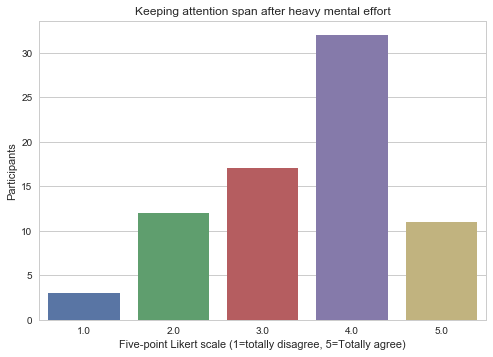

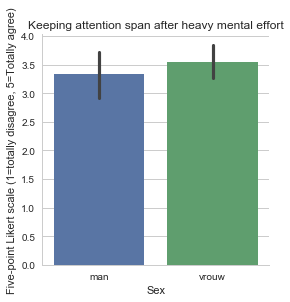

In [28]:
print 'Mean personality5:', np.mean(df['baselineE_personality5'])
print 'Standard deviation personality5:', np.std(df['baselineE_personality5'])

freq_personality5 = df.baselineE_personality5.value_counts()
ax = sns.barplot(x=freq_personality5.index, y=freq_personality5)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Keeping attention span after heavy mental effort')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality5', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Keeping attention span after heavy mental effort')

Mean personality6: 3.97333333333
Standard deviation personality6: 0.979432942518


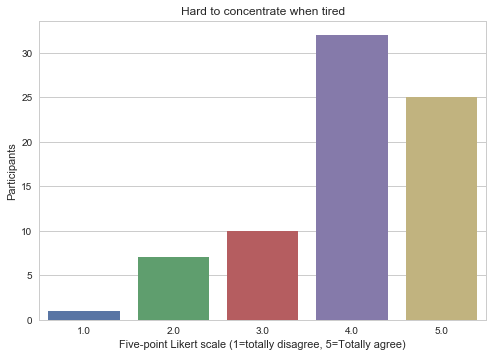

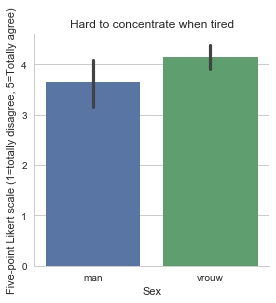

In [29]:
print 'Mean personality6:', np.mean(df['baselineE_personality6'])
print 'Standard deviation personality6:', np.std(df['baselineE_personality6'])

freq_personality6 = df.baselineE_personality6.value_counts()
ax = sns.barplot(x=freq_personality6.index, y=freq_personality6)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Hard to concentrate when tired')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality6', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Hard to concentrate when tired')

Mean personality7: 3.10666666667
Standard deviation personality7: 1.13810759109


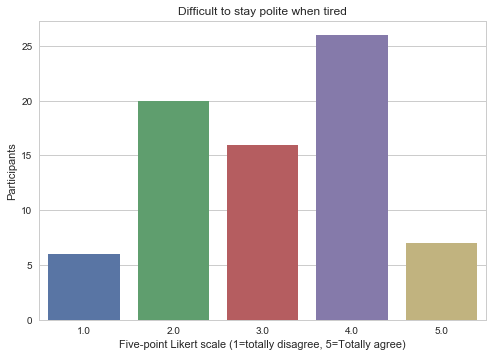

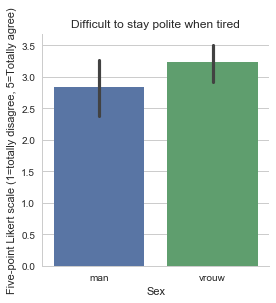

In [30]:
print 'Mean personality7:', np.mean(df['baselineE_personality7'])
print 'Standard deviation personality7:', np.std(df['baselineE_personality7'])

freq_personality7 = df.baselineE_personality7.value_counts()
ax = sns.barplot(x=freq_personality7.index, y=freq_personality7)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Difficult to stay polite when tired')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality7', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Difficult to stay polite when tired')

Mean personality8: 2.74666666667
Standard deviation personality8: 1.16725699351


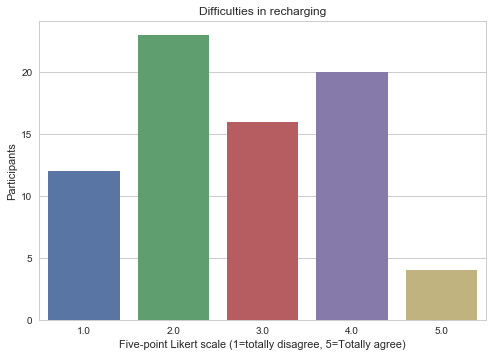

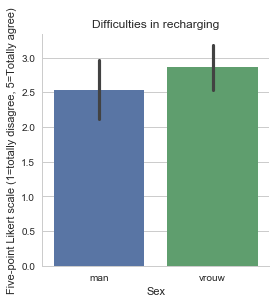

In [31]:
print 'Mean personality8:', np.mean(df['baselineE_personality8'])
print 'Standard deviation personality8:', np.std(df['baselineE_personality8'])

freq_personality8 = df.baselineE_personality8.value_counts()
ax = sns.barplot(x=freq_personality8.index, y=freq_personality8)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Difficulties in recharging')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality8', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Difficulties in recharging')

Mean personality9: 3.25333333333
Standard deviation personality9: 1.22303811152


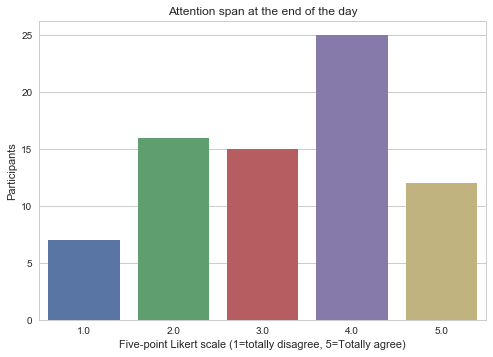

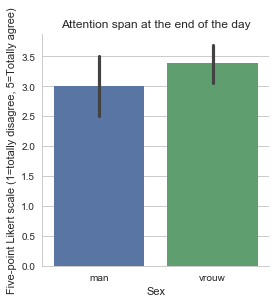

In [32]:
print 'Mean personality9:', np.mean(df['baselineE_personality9'])
print 'Standard deviation personality9:', np.std(df['baselineE_personality9'])

freq_personality9 = df.baselineE_personality9.value_counts()
ax = sns.barplot(x=freq_personality9.index, y=freq_personality9)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Attention span at the end of the day')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality9', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Attention span at the end of the day')

Mean personality10: 3.58666666667
Standard deviation personality10: 1.09658054373


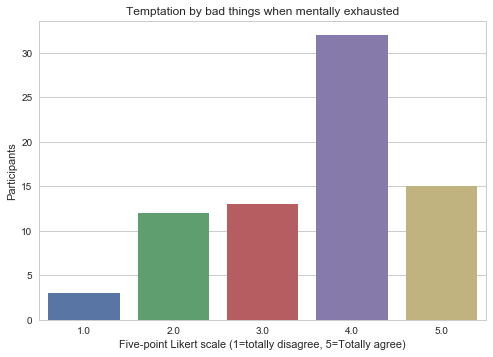

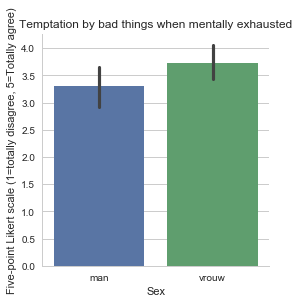

In [33]:
print 'Mean personality10:', np.mean(df['baselineE_personality10'])
print 'Standard deviation personality10:', np.std(df['baselineE_personality10'])

freq_personality10 = df.baselineE_personality10.value_counts()
ax = sns.barplot(x=freq_personality10.index, y=freq_personality10)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Temptation by bad things when mentally exhausted')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality10', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Temptation by bad things when mentally exhausted')

Mean personality11: 2.52
Standard deviation personality11: 1.15885000467


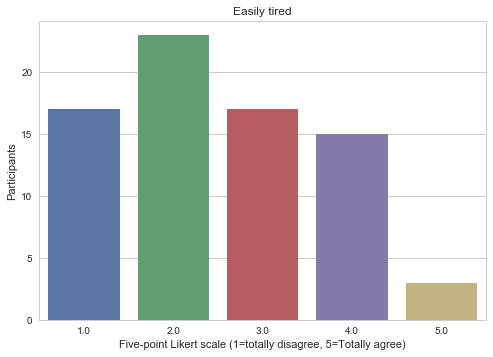

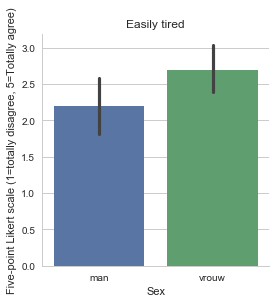

In [34]:
print 'Mean personality11:', np.mean(df['baselineE_personality11'])
print 'Standard deviation personality11:', np.std(df['baselineE_personality11'])

freq_personality11 = df.baselineE_personality11.value_counts()
ax = sns.barplot(x=freq_personality11.index, y=freq_personality11)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Easily tired')

g = sns.factorplot(x='baselineD_sex', y='baselineE_personality11', data=df, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', title='Easily tired')

# Use of strategies before experiment

In [35]:
df_strategies = pd.read_csv('strategies_data.csv')
df_strategies = df_strategies.dropna()
sns.set_style("whitegrid")

## Avoidance of temptations

In [36]:
avoid_df = df_strategies[['strategiesA_avoid1', 'strategiesA_avoid2', 'strategiesA_avoid3', 'strategiesA_avoid4']]
print 'Average usage of avoid strategies', np.mean(avoid_df)
print 'Average usage of avoid category', np.sum(np.mean(avoid_df))/4

Average usage of avoid strategies strategiesA_avoid1    1.880000
strategiesA_avoid2    2.280000
strategiesA_avoid3    2.200000
strategiesA_avoid4    2.866667
dtype: float64
Average usage of avoid category 2.30666666667


## Controlling temptations

In [37]:
control_df = df_strategies[['strategiesB_control1', 'strategiesB_control2', 'strategiesB_control3', 'strategiesB_control4']]
print 'Average usage of control strategies', np.mean(control_df)
print 'Average usage of control category', np.sum(np.mean(control_df))/4

Average usage of control strategies strategiesB_control1    3.066667
strategiesB_control2    2.426667
strategiesB_control3    2.733333
strategiesB_control4    2.626667
dtype: float64
Average usage of control category 2.71333333333


## Goal deliberation

In [38]:
goals_df = df_strategies[['strategiesB_goals1', 'strategiesB_goals2', 'strategiesB_goals3', 'strategiesB_goals4']]
print 'Average usage of goal deliberation strategies', np.mean(goals_df)
print 'Average usage of goal deliberation', np.sum(np.mean(goals_df))/4

Average usage of goal deliberation strategies strategiesB_goals1    3.013333
strategiesB_goals2    2.973333
strategiesB_goals3    3.120000
strategiesB_goals4    2.893333
dtype: float64
Average usage of goal deliberation 3.0


## Distraction

In [39]:
distraction_df = df_strategies[['strategiesC_distraction1', 'strategiesC_distraction2', 'strategiesC_distraction3', 'strategiesC_distraction4']]
print 'Average usage of distraction strategies', np.mean(distraction_df)
print 'Average usage of distraction category', np.sum(np.mean(distraction_df))/4

Average usage of distraction strategies strategiesC_distraction1    2.226667
strategiesC_distraction2    2.013333
strategiesC_distraction3    2.800000
strategiesC_distraction4    2.280000
dtype: float64
Average usage of distraction category 2.33


## Goal and rulesetting

In [40]:
rules_df = df_strategies[['strategiesC_rules1', 'strategiesC_rules2', 'strategiesC_rules3', 'strategiesC_rules4']]
print 'Average usage of rules strategies', np.mean(rules_df)
print 'Average usage of rules category', np.sum(np.mean(rules_df))/4

Average usage of rules strategies strategiesC_rules1    3.733333
strategiesC_rules2    2.120000
strategiesC_rules3    2.520000
strategiesC_rules4    3.533333
dtype: float64
Average usage of rules category 2.97666666667


## Suppression

In [41]:
suppression_df = df_strategies[['strategiesD_suppress1', 'strategiesD_suppress2', 'strategiesD_suppress3', 'strategiesD_suppress4']]
print 'Average usage of suppression strategies', np.mean(suppression_df)
print 'Average usage of suppression category', np.sum(np.mean(suppression_df))/4

Average usage of suppression strategies strategiesD_suppress1    2.093333
strategiesD_suppress2    2.266667
strategiesD_suppress3    2.533333
strategiesD_suppress4    2.360000
dtype: float64
Average usage of suppression category 2.31333333333


## Psychological meaning of the goal

In [42]:
psy_df = df_strategies[['strategiesD_psychological1', 'strategiesD_psychological2', 'strategiesD_psychological3', 'strategiesD_psychological4']]
print 'Average usage of psychological strategies', np.mean(psy_df)
print 'Average usage of psychological category', np.sum(np.mean(psy_df))/4

Average usage of psychological strategies strategiesD_psychological1    2.333333
strategiesD_psychological2    2.426667
strategiesD_psychological3    2.626667
strategiesD_psychological4    2.626667
dtype: float64
Average usage of psychological category 2.50333333333


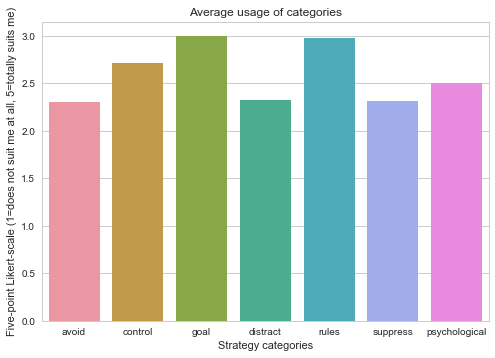

In [43]:
ax = sns.barplot(x=['avoid', 'control', 'goal', 'distract', 'rules', 'suppress', 'psychological'], 
                 y=[np.sum(np.mean(avoid_df))/4, np.sum(np.mean(control_df))/4, np.sum(np.mean(goals_df))/4, 
                    np.sum(np.mean(distraction_df))/4, np.sum(np.mean(rules_df))/4, np.sum(np.mean(suppression_df))/4, 
                    np.sum(np.mean(psy_df))/4])

ax.set(xlabel='Strategy categories', 
       ylabel='Five-point Likert-scale (1=does not suit me at all, 5=totally suits me)', 
       title='Average usage of categories')

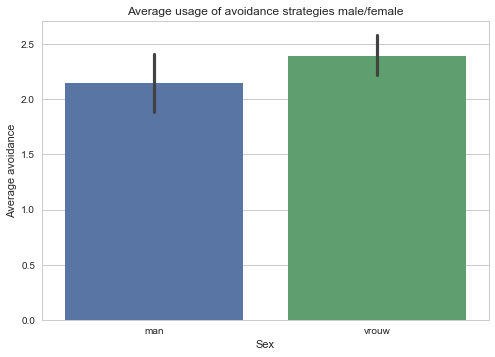

In [44]:
dfc = df['controlGroup']
dfs = df['baselineD_sex']
df1 = avoid_df.mean(axis=1)
df_cs1 = pd.concat([dfc, dfs, df1], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs1)
ax.set(xlabel='Sex', ylabel='Average avoidance', title='Average usage of avoidance strategies male/female')

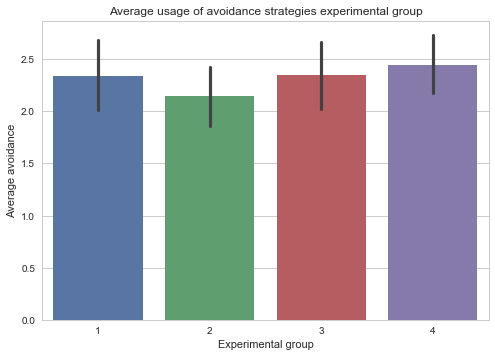

In [45]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs1)
ax.set(xlabel='Experimental group', ylabel='Average avoidance', title='Average usage of avoidance strategies experimental group')

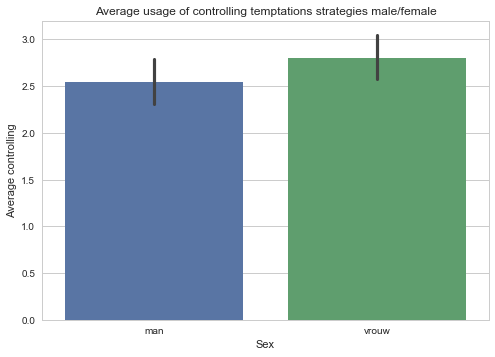

In [46]:
df2 = control_df.mean(axis=1)
df_cs2 = pd.concat([dfc, dfs, df2], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs2)
ax.set(xlabel='Sex', ylabel='Average controlling', title='Average usage of controlling temptations strategies male/female')

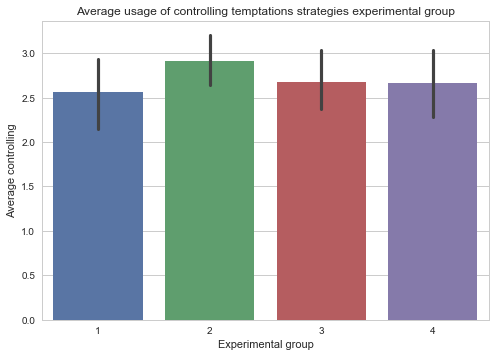

In [47]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs2)
ax.set(xlabel='Experimental group', ylabel='Average controlling', title='Average usage of controlling temptations strategies experimental group')

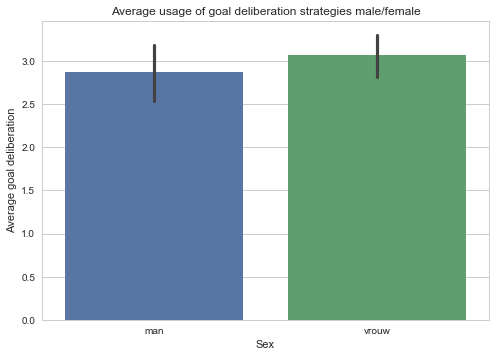

In [48]:
df3 = goals_df.mean(axis=1)
df_cs3 = pd.concat([dfc, dfs, df3], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs3)
ax.set(xlabel='Sex', ylabel='Average goal deliberation', title='Average usage of goal deliberation strategies male/female')

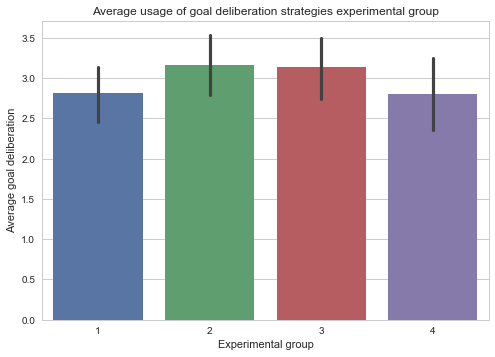

In [49]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs3)
ax.set(xlabel='Experimental group', ylabel='Average goal deliberation', title='Average usage of goal deliberation strategies experimental group')

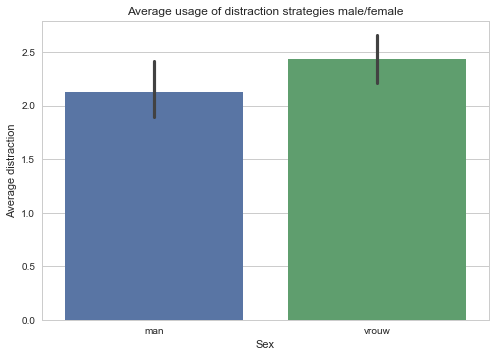

In [50]:
df4 = distraction_df.mean(axis=1)
df_cs4 = pd.concat([dfc, dfs, df4], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs4)
ax.set(xlabel='Sex', ylabel='Average distraction', title='Average usage of distraction strategies male/female')

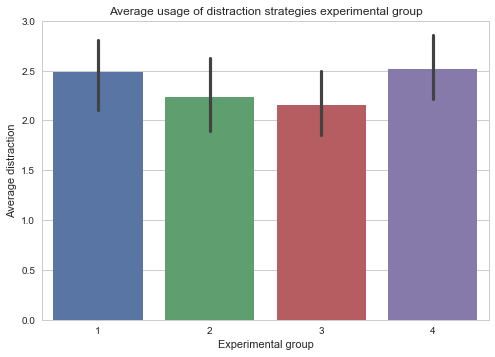

In [51]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs4)
ax.set(xlabel='Experimental group', ylabel='Average distraction', title='Average usage of distraction strategies experimental group')

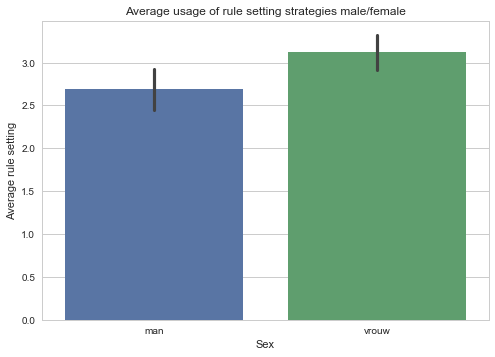

In [52]:
df5 = rules_df.mean(axis=1)
df_cs5 = pd.concat([dfc, dfs, df5], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs5)
ax.set(xlabel='Sex', ylabel='Average rule setting', title='Average usage of rule setting strategies male/female')

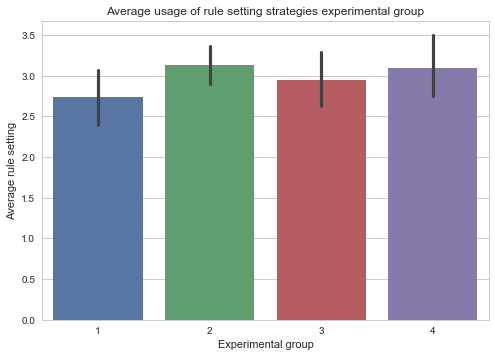

In [53]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs5)
ax.set(xlabel='Experimental group', ylabel='Average rule setting', title='Average usage of rule setting strategies experimental group')

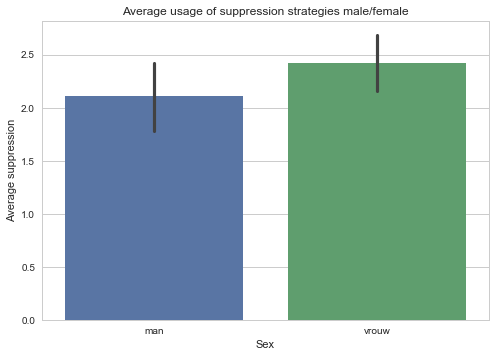

In [54]:
df6 = suppression_df.mean(axis=1)
df_cs6 = pd.concat([dfc, dfs, df6], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs6)
ax.set(xlabel='Sex', ylabel='Average suppression', title='Average usage of suppression strategies male/female')

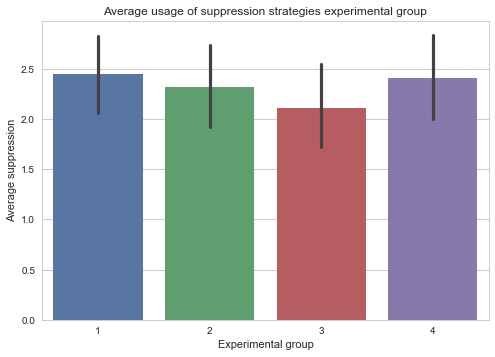

In [55]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs6)
ax.set(xlabel='Experimental group', ylabel='Average suppression', title='Average usage of suppression strategies experimental group')

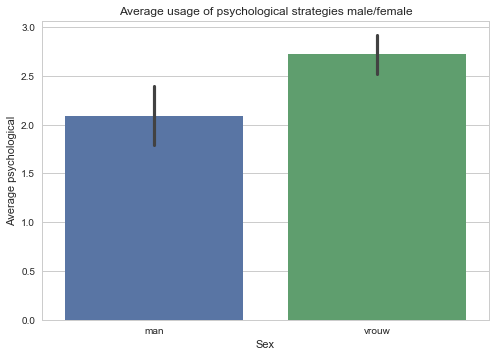

In [56]:
df7 = psy_df.mean(axis=1)
df_cs7 = pd.concat([dfc, dfs, df7], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs7)
ax.set(xlabel='Sex', ylabel='Average psychological', title='Average usage of psychological strategies male/female')

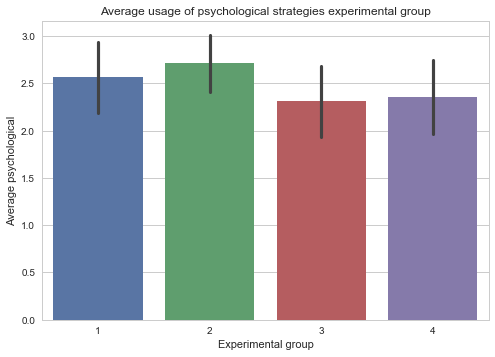

In [57]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs7)
ax.set(xlabel='Experimental group', ylabel='Average psychological', title='Average usage of psychological strategies experimental group')

# Snacking behavior during the experiment

                            email  day 1_awake_lunch  day 1_diner_sleep  \
0          hiddelekanne@gmail.com                0.0                0.0   
1             ali_e27@hotmail.com                0.0                1.0   
2            puckmennen@gmail.com                0.0                3.0   
3          living_in_adam@live.nl                0.0                0.0   
8           luukverlaan@gmail.com                0.0                4.0   
10             begysari@gmail.com                0.0                0.0   
12     brynngunterman@hotmail.com                0.0                0.0   
18          peterdohmen@yahoo.com                0.0                0.0   
19             cae3vd2b@gmail.com                0.0                0.0   
21           aboud.to@hotmail.com                0.0                0.0   
29        cagla.kucuk@hotmail.com                0.0                0.0   
32       annelorefranke@gmail.com                0.0                0.0   
39           gossa_lo@hot

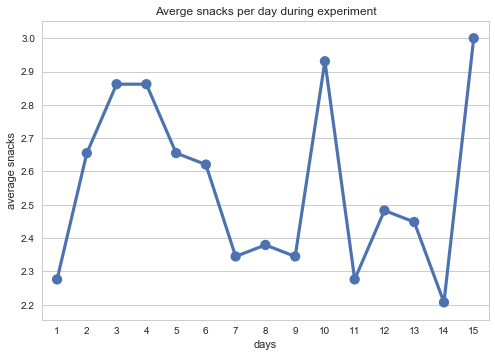

In [113]:
df_daily = pd.read_csv('daily_data.csv')
df_daily = df_daily.dropna()

print df_daily

for i in range(15):
    day = 'day_%d' % (i + 1)
    var1 = 'day %d_awake_lunch' % (i + 1)
    var2 = 'day %d_diner_sleep' % (i + 1)
    var3 = 'day %d_lunch_diner' % (i + 1)
    df_daily[day] = df_daily[var1] + df_daily[var2] + df_daily[var3]

daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    daily_averages.append(np.mean(df_daily[day]))

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Averge snacks per day during experiment')

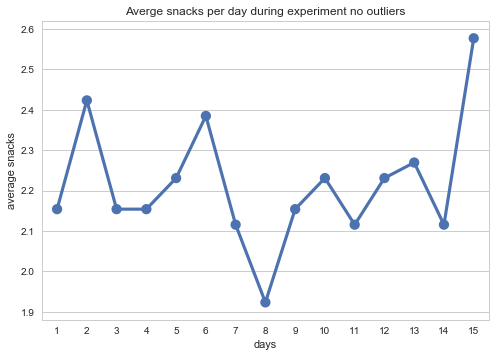

In [60]:
no_outliers = df_daily
for i in range(15):
    time1 = 'day %d_lunch_diner' % (i + 1)
    time2 = 'day %d_awake_lunch' % (i + 1)
    time3 = 'day %d_diner_sleep' % (i + 1)
    day = 'day_%d' % (i + 1)
    no_outliers = no_outliers[no_outliers[time1] < 10]
    no_outliers = no_outliers[no_outliers[time2] < 10]
    no_outliers = no_outliers[no_outliers[time3] < 10]
    no_outliers = no_outliers[no_outliers[day] < 10]

daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    daily_averages.append(np.mean(no_outliers[day]))

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Averge snacks per day during experiment no outliers')

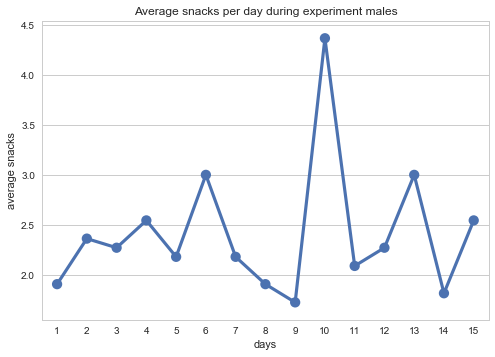

In [61]:
df_dgs = pd.concat([dfc, dfs, df_daily], axis=1)
df_dgs = df_dgs.dropna()

daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.mean(df_dgs.loc[df_dgs['baselineD_sex'] == 'man', day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment males')

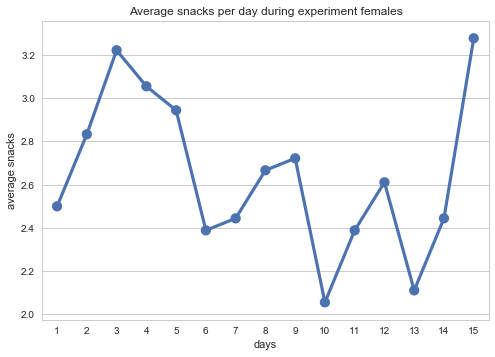

In [62]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.mean(df_dgs.loc[df_dgs['baselineD_sex'] == 'vrouw', day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment females')

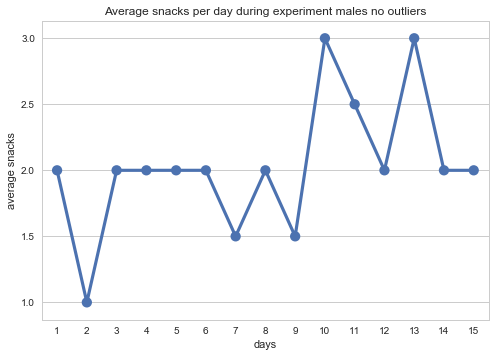

In [63]:
df_dgs_no = pd.concat([dfc, dfs, no_outliers], axis=1)
df_dgs_no = df_dgs_no.dropna()

daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.median(df_dgs_no.loc[df_dgs_no['baselineD_sex'] == 'man', day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment males no outliers')

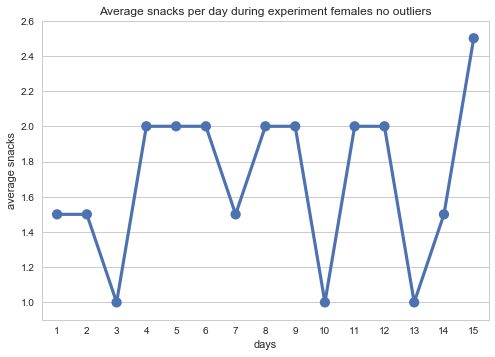

In [64]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.median(df_dgs_no.loc[df_dgs_no['baselineD_sex'] == 'vrouw', day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment females no outliers')

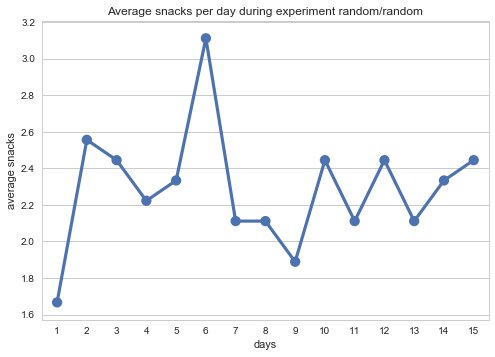

In [65]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.mean(df_dgs.loc[df_dgs['controlGroup'] == 1, day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment random/random')

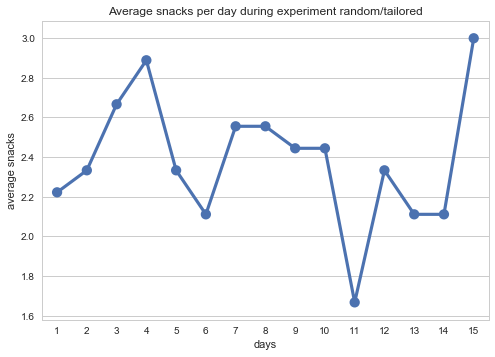

In [66]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.mean(df_dgs.loc[df_dgs['controlGroup'] == 2, day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment random/tailored')

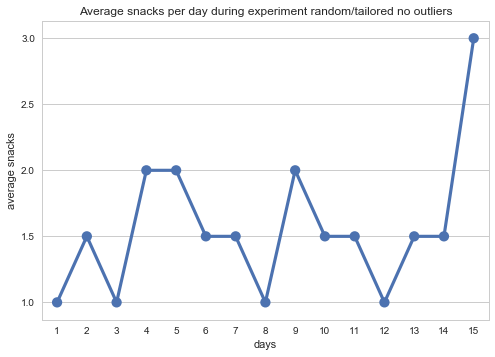

In [67]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.median(df_dgs_no.loc[df_dgs_no['controlGroup'] == 2, day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment random/tailored no outliers')

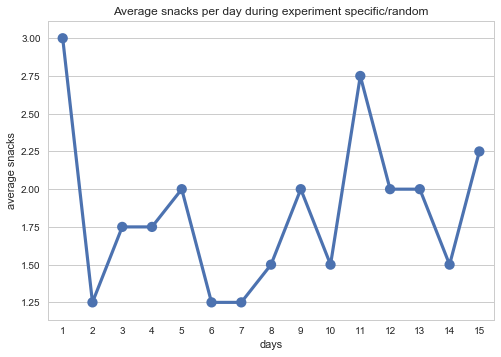

In [68]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.mean(df_dgs.loc[df_dgs['controlGroup'] == 3, day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment specific/random')

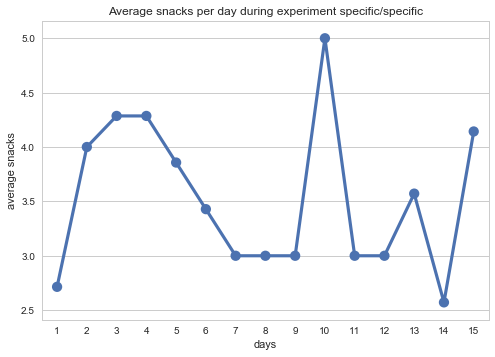

In [69]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    average = np.mean(df_dgs.loc[df_dgs['controlGroup'] == 4, day])
    daily_averages.append(average)

ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment specific/specific')

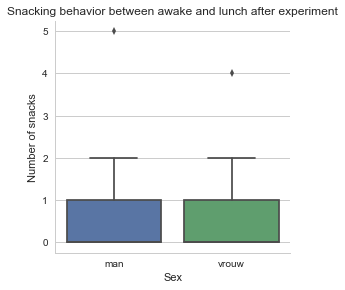

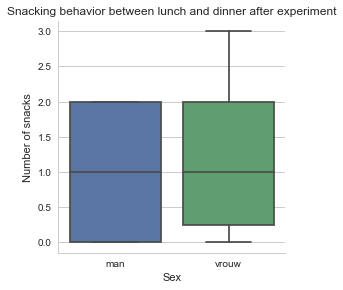

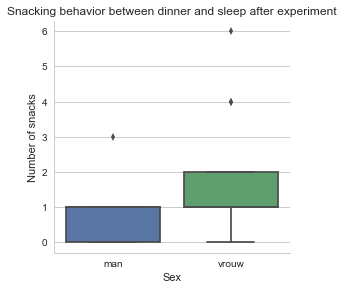

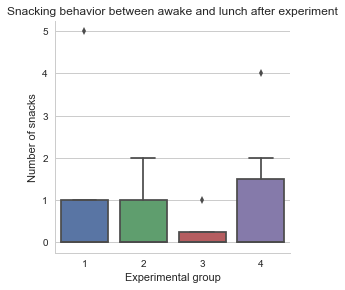

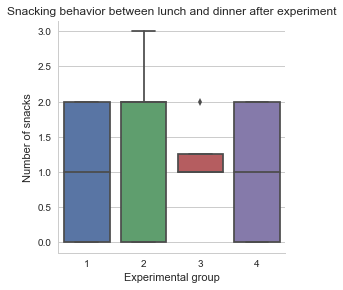

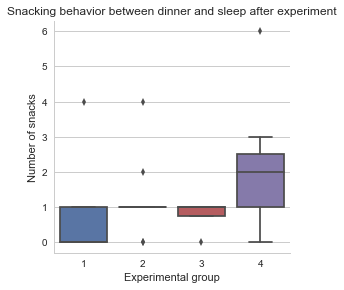

In [70]:
df_new = pd.concat([df['baselineD_sex'], df['controlGroup'], df_daily], axis=1)
g = sns.factorplot(x='baselineD_sex', y='day 15_awake_lunch', data=df_new, kind="box")
g.set(xlabel='Sex', ylabel='Number of snacks', title='Snacking behavior between awake and lunch after experiment')

g = sns.factorplot(x='baselineD_sex', y='day 15_lunch_diner', data=df_new, kind="box")
g.set(xlabel='Sex', ylabel='Number of snacks', title='Snacking behavior between lunch and dinner after experiment')

g = sns.factorplot(x='baselineD_sex', y='day 15_diner_sleep', data=df_new, kind="box")
g.set(xlabel='Sex', ylabel='Number of snacks', title='Snacking behavior between dinner and sleep after experiment')

#Controlgroup
g = sns.factorplot(x='controlGroup', y='day 15_awake_lunch', data=df_new, kind="box")
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between awake and lunch after experiment')

g = sns.factorplot(x='controlGroup', y='day 15_lunch_diner', data=df_new, kind="box")
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between lunch and dinner after experiment')

g = sns.factorplot(x='controlGroup', y='day 15_diner_sleep', data=df_new, kind="box")
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior between dinner and sleep after experiment')

# Message statistics

In [71]:
df_messages = pd.read_csv('messages_data.csv')
# print df_messages['email']
# print df_messages.count(axis=1)
exp1 = df_messages.loc[df_messages['controlGroup'] == 1]
exp1 = exp1.count(axis=1)
exp1 = exp1 - 2
exp1 = exp1[exp1 != 0]
average_read_1 = np.mean(exp1 / 3)

exp2 = df_messages.loc[df_messages['controlGroup'] == 2]
exp2 = exp2.count(axis=1)
exp2 = exp2 - 2
exp2 = exp2[exp2 != 0]
average_read_2 = np.mean(exp2 / 3)

exp3 = df_messages.loc[df_messages['controlGroup'] == 3]
exp3 = exp3.count(axis=1)
exp3 = exp3 - 2
exp3 = exp3[exp3 != 0]
average_read_3 = np.mean(exp3 / 3)

exp4 = df_messages.loc[df_messages['controlGroup'] == 4]
exp4 = exp4.count(axis=1)
exp4 = exp4 - 2
exp4 = exp4[exp4 != 0]
average_read_4 = np.mean(exp4 / 3)

print 'average read messages group 1:', average_read_1
print 'average read messages group 2:', average_read_2
print 'average read messages group 3:', average_read_3
print 'average read messages group 4:', average_read_4

average read messages group 1: 29.4615384615
average read messages group 2: 12.3333333333
average read messages group 3: 16.7142857143
average read messages group 4: 15.9090909091


# Final survey results

In [114]:
df_final = pd.read_csv('final_data.csv')
df_final = df_final.dropna()
print df_final

                         email  endA_endAvoid1  endA_endAvoid2  \
0       hiddelekanne@gmail.com             1.0             4.0   
1          ali_e27@hotmail.com             3.0             4.0   
2         puckmennen@gmail.com             2.0             3.0   
3       living_in_adam@live.nl             1.0             2.0   
8        luukverlaan@gmail.com             1.0             2.0   
18       peterdohmen@yahoo.com             1.0             1.0   
19          cae3vd2b@gmail.com             2.0             2.0   
21        aboud.to@hotmail.com             4.0             4.0   
29     cagla.kucuk@hotmail.com             1.0             1.0   
32    annelorefranke@gmail.com             2.0             2.0   
39        gossa_lo@hotmail.com             2.0             2.0   
45     sq_shehnaaz@hotmail.com             1.0             2.0   
50            nina@vanlooij.nl             3.0             2.0   
67     ryanne.koomen@gmail.com             1.0             1.0   
73    asiy

## Avoid after experiment

In [73]:
avoid_after = df_final[['endA_endAvoid1', 'endA_endAvoid2', 'endA_endAvoid3', 'endA_endAvoid4']]
print 'Average usage of avoid strategies after', np.mean(avoid_after)
print 'Average usage of avoid category after', np.sum(np.mean(avoid_after))/4

Average usage of avoid strategies after endA_endAvoid1    1.814815
endA_endAvoid2    2.148148
endA_endAvoid3    2.222222
endA_endAvoid4    1.851852
dtype: float64
Average usage of avoid category after 2.00925925926


## Control after experiment

In [74]:
control_after = df_final[['endB_endControl1', 'endB_endControl2', 'endB_endControl3', 'endB_endControl4']]
print 'Average usage of control strategies after', np.mean(control_after)
print 'Average usage of control category after', np.sum(np.mean(control_after))/4

Average usage of control strategies after endB_endControl1    2.740741
endB_endControl2    2.222222
endB_endControl3    2.407407
endB_endControl4    2.666667
dtype: float64
Average usage of control category after 2.50925925926


## Goals after experiment

In [75]:
goals_after = df_final[['endB_endGoals1', 'endB_endGoals2', 'endB_endGoals3', 'endB_endGoals4']]
print 'Average usage of goal deliberation strategies after', np.mean(goals_after)
print 'Average usage of goal deliberation category after', np.sum(np.mean(goals_after))/4

Average usage of goal deliberation strategies after endB_endGoals1    2.444444
endB_endGoals2    2.481481
endB_endGoals3    2.444444
endB_endGoals4    2.444444
dtype: float64
Average usage of goal deliberation category after 2.4537037037


## Distraction after experiment

In [76]:
distraction_after = df_final[['endC_endDistraction1', 'endC_endDistraction2', 'endC_endDistraction3', 'endC_endDistraction4']]
print 'Average usage of distraction strategies after', np.mean(distraction_after)
print 'Average usage of distraction category after', np.sum(np.mean(distraction_after))/4

Average usage of distraction strategies after endC_endDistraction1    2.111111
endC_endDistraction2    1.777778
endC_endDistraction3    2.518519
endC_endDistraction4    2.000000
dtype: float64
Average usage of distraction category after 2.10185185185


## Rule setting after experiment

In [77]:
rules_after = df_final[['endC_endRules1', 'endC_endRules2', 'endC_endRules3', 'endC_endRules4']]
print 'Average usage of rule setting strategies after', np.mean(rules_after)
print 'Average usage of rule setting category after', np.sum(np.mean(rules_after))/4

Average usage of rule setting strategies after endC_endRules1    3.111111
endC_endRules2    2.037037
endC_endRules3    2.185185
endC_endRules4    3.074074
dtype: float64
Average usage of rule setting category after 2.60185185185


## Suppression after experiment

In [78]:
suppression_after = df_final[['endD_endSuppress1', 'endD_endSuppress2', 'endD_endSuppress3', 'endD_endSuppress4']]
print 'Average usage of suppression strategies after', np.mean(suppression_after)
print 'Average usage of suppression category after', np.sum(np.mean(suppression_after))/4

Average usage of suppression strategies after endD_endSuppress1    1.777778
endD_endSuppress2    2.296296
endD_endSuppress3    2.592593
endD_endSuppress4    2.333333
dtype: float64
Average usage of suppression category after 2.25


## Psychological meaning towards goal after experiment

In [79]:
psy_after = df_final[['endD_endPsychological1', 'endD_endPsychological2', 'endD_endPsychological3', 'endD_endPsychological4']]
print 'Average usage of psychologica strategies after', np.mean(psy_after)
print 'Average usage of psychological category after', np.sum(np.mean(psy_after))/4

Average usage of psychologica strategies after endD_endPsychological1    2.259259
endD_endPsychological2    2.296296
endD_endPsychological3    2.407407
endD_endPsychological4    2.037037
dtype: float64
Average usage of psychological category after 2.25


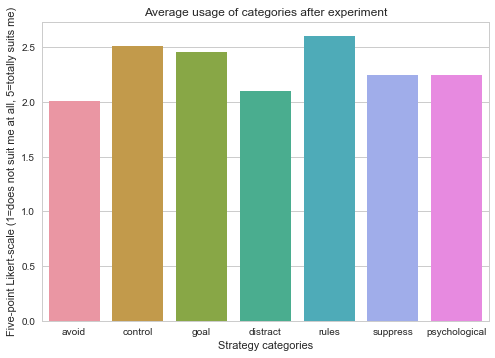

In [80]:
ax = sns.barplot(x=['avoid', 'control', 'goal', 'distract', 'rules', 'suppress', 'psychological'], 
                 y=[np.sum(np.mean(avoid_after))/4, np.sum(np.mean(control_after))/4, np.sum(np.mean(goals_after))/4, 
                    np.sum(np.mean(distraction_after))/4, np.sum(np.mean(rules_after))/4, np.sum(np.mean(suppression_after))/4, 
                    np.sum(np.mean(psy_after))/4])

ax.set(xlabel='Strategy categories', 
       ylabel='Five-point Likert-scale (1=does not suit me at all, 5=totally suits me)', 
       title='Average usage of categories after experiment')

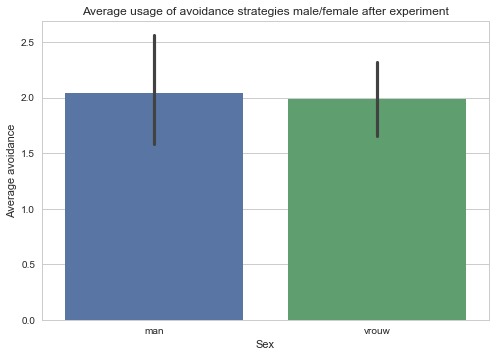

In [81]:
df1 = avoid_after.mean(axis=1)
df_cs1 = pd.concat([dfc, dfs, df1], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs1)
ax.set(xlabel='Sex', ylabel='Average avoidance', title='Average usage of avoidance strategies male/female after experiment')

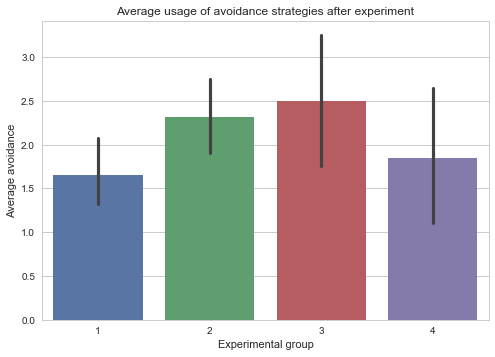

In [82]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs1)
ax.set(xlabel='Experimental group', ylabel='Average avoidance', title='Average usage of avoidance strategies after experiment')

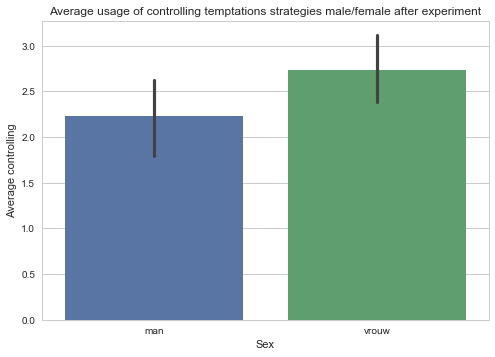

In [83]:
df2 = control_after.mean(axis=1)
df_cs2 = pd.concat([dfc, dfs, df2], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs2)
ax.set(xlabel='Sex', ylabel='Average controlling', 
       title='Average usage of controlling temptations strategies male/female after experiment')

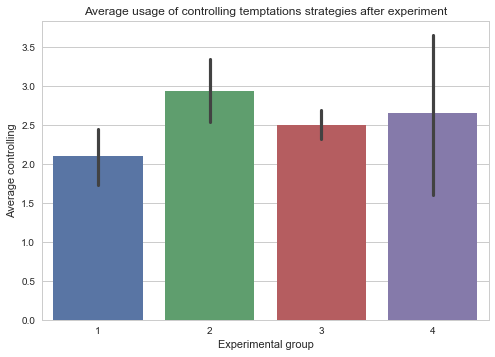

In [84]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs2)
ax.set(xlabel='Experimental group', ylabel='Average controlling', 
       title='Average usage of controlling temptations strategies after experiment')

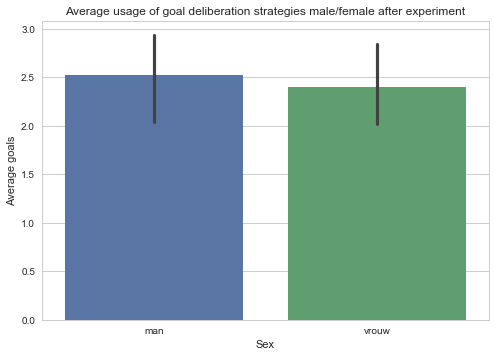

In [85]:
df3 = goals_after.mean(axis=1)
df_cs3 = pd.concat([dfc, dfs, df3], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs3)
ax.set(xlabel='Sex', ylabel='Average goals', 
       title='Average usage of goal deliberation strategies male/female after experiment')

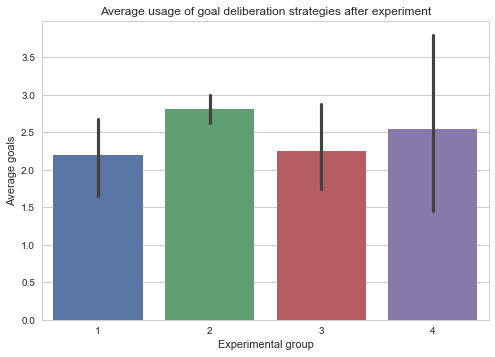

In [86]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs3)
ax.set(xlabel='Experimental group', ylabel='Average goals', 
       title='Average usage of goal deliberation strategies after experiment')

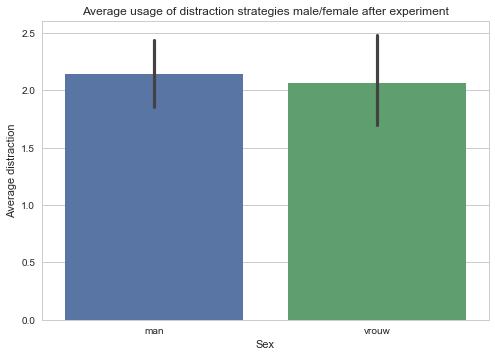

In [87]:
df4 = distraction_after.mean(axis=1)
df_cs4 = pd.concat([dfc, dfs, df4], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs4)
ax.set(xlabel='Sex', ylabel='Average distraction', 
       title='Average usage of distraction strategies male/female after experiment')

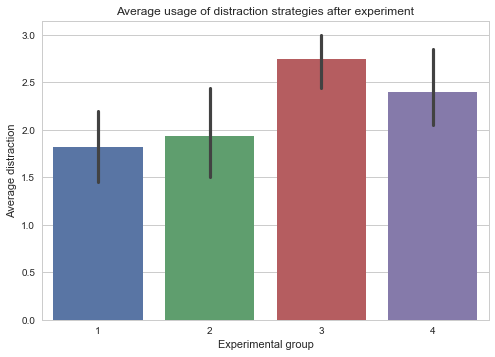

In [88]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs4)
ax.set(xlabel='Experimental group', ylabel='Average distraction', 
       title='Average usage of distraction strategies after experiment')

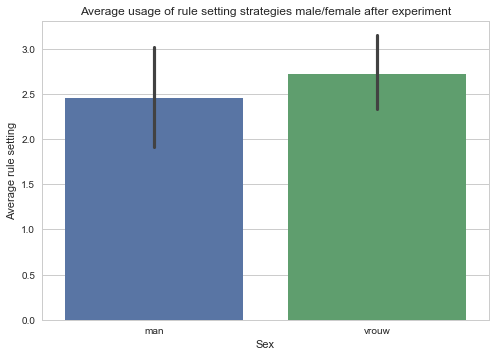

In [89]:
df5 = rules_after.mean(axis=1)
df_cs5 = pd.concat([dfc, dfs, df5], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs5)
ax.set(xlabel='Sex', ylabel='Average rule setting', 
       title='Average usage of rule setting strategies male/female after experiment')

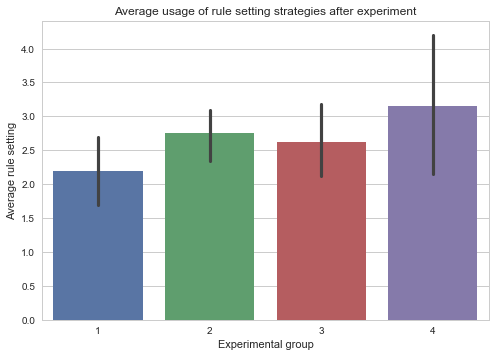

In [90]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs5)
ax.set(xlabel='Experimental group', ylabel='Average rule setting', 
       title='Average usage of rule setting strategies after experiment')

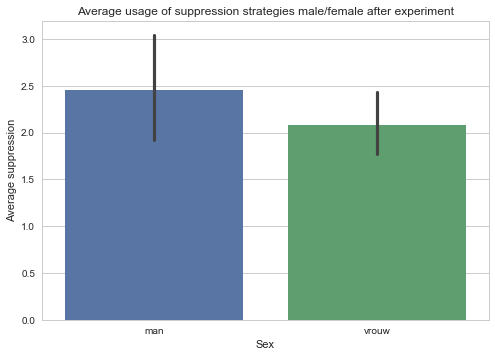

In [91]:
df6 = suppression_after.mean(axis=1)
df_cs6 = pd.concat([dfc, dfs, df6], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs6)
ax.set(xlabel='Sex', ylabel='Average suppression', 
       title='Average usage of suppression strategies male/female after experiment')

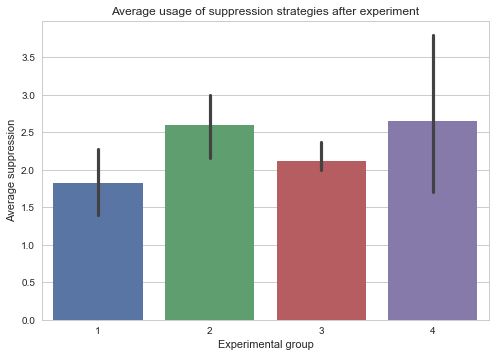

In [92]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs6)
ax.set(xlabel='Experimental group', ylabel='Average suppression', 
       title='Average usage of suppression strategies after experiment')

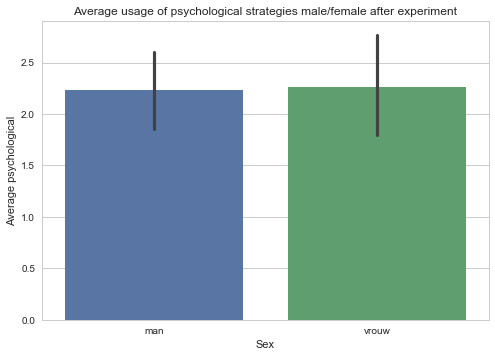

In [93]:
df7 = psy_after.mean(axis=1)
df_cs7 = pd.concat([dfc, dfs, df7], axis=1)

ax = sns.barplot(x='baselineD_sex', y=0, data=df_cs7)
ax.set(xlabel='Sex', ylabel='Average psychological', 
       title='Average usage of psychological strategies male/female after experiment')

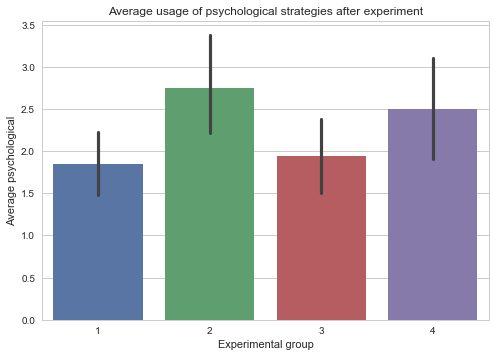

In [94]:
ax = sns.barplot(x='controlGroup', y=0, data=df_cs7)
ax.set(xlabel='Experimental group', ylabel='Average psychological', 
       title='Average usage of psychological strategies after experiment')

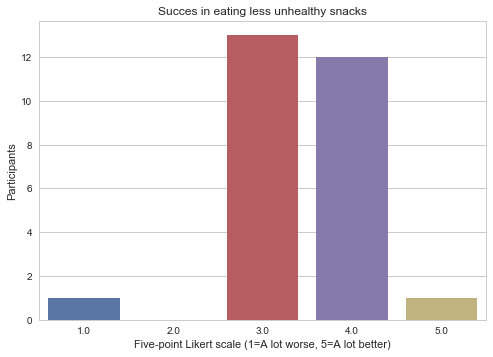

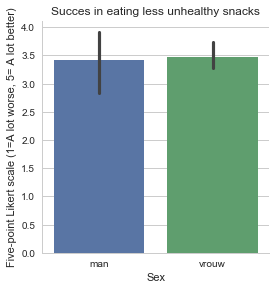

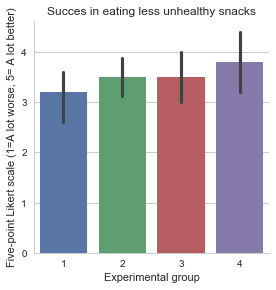

In [95]:
df_new = pd.concat([df_final, df['controlGroup'], df['baselineD_sex']], axis=1)
df_new = df_new.dropna()

freq_betmin = df_new.endE_betMin.value_counts()
xvalues = dict(freq_betmin)
xvalues[2.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Five-point Likert scale (1=A lot worse, 5=A lot better)', ylabel='Participants', title='Succes in eating less unhealthy snacks')

g = sns.factorplot(x='baselineD_sex', y='endE_betMin', data=df_new, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes in eating less unhealthy snacks')

g = sns.factorplot(x='controlGroup', y='endE_betMin', data=df_new, kind="bar")
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes in eating less unhealthy snacks')

In [96]:
from scipy.stats import ttest_ind
# cat1 = df_new[df_new['controlGroup']==1]
# cat2 = df_new[df_new['controlGroup']==4]

# ttest_ind(cat1['endE_betMin'], cat2['endE_betMin'])

finalgroup1 = df_new.query('controlGroup == 1')
finalgroup2 = df_new.query('controlGroup == 2')
finalgroup3 = df_new.query('controlGroup == 3')
finalgroup4 = df_new.query('controlGroup == 4')

cat1 = pd.concat([finalgroup1[['endE_betMin']], finalgroup3[['endE_betMin']]])
cat2 = pd.concat([finalgroup2[['endE_betMin']], finalgroup4[['endE_betMin']]])
ttest_ind(cat1['endE_betMin'], cat2['endE_betMin'])

Ttest_indResult(statistic=-1.1464754199451388, pvalue=0.26245366288623223)

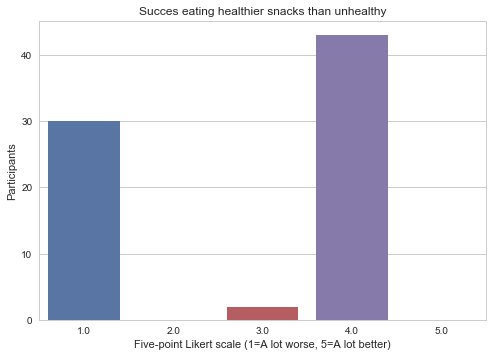

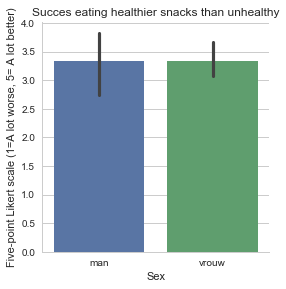

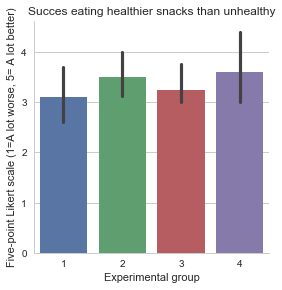

In [97]:
freq_betVerv = df_new.endE_betVerv.value_counts()
xvalues = dict(freq_location)
xvalues[2.0] = 0
xvalues[5.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Five-point Likert scale (1=A lot worse, 5=A lot better)', ylabel='Participants', title='Succes eating healthier snacks than unhealthy')

g = sns.factorplot(x='baselineD_sex', y='endE_betVerv', data=df_new, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes eating healthier snacks than unhealthy')

g = sns.factorplot(x='controlGroup', y='endE_betVerv', data=df_new, kind="bar")
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes eating healthier snacks than unhealthy')

In [98]:
finalgroup1 = df_new.query('controlGroup == 1')
finalgroup2 = df_new.query('controlGroup == 2')
finalgroup3 = df_new.query('controlGroup == 3')
finalgroup4 = df_new.query('controlGroup == 4')

cat1 = pd.concat([finalgroup1[['endE_betVerv']], finalgroup3[['endE_betVerv']]])
cat2 = pd.concat([finalgroup2[['endE_betVerv']], finalgroup4[['endE_betVerv']]])


ttest_ind(cat1['endE_betVerv'], cat2['endE_betVerv'])

Ttest_indResult(statistic=-1.2475657231036104, pvalue=0.22375033462147248)

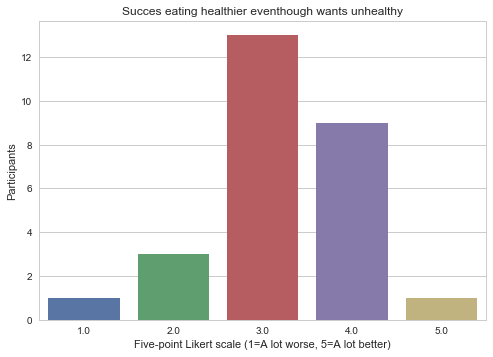

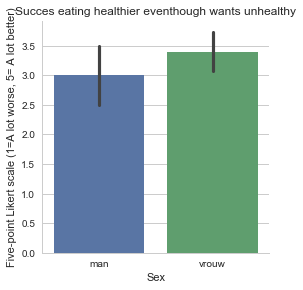

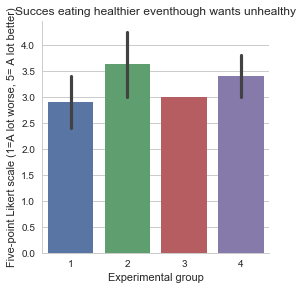

In [99]:
freq_betWeerst = df_new.endE_betWeerst.value_counts()
ax = sns.barplot(x=freq_betWeerst.index, y=freq_betWeerst)
ax.set(xlabel='Five-point Likert scale (1=A lot worse, 5=A lot better)', ylabel='Participants', title='Succes eating healthier eventhough wants unhealthy')

g = sns.factorplot(x='baselineD_sex', y='endE_betWeerst', data=df_new, kind="bar")
g.set(xlabel='Sex', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes eating healthier eventhough wants unhealthy')

g = sns.factorplot(x='controlGroup', y='endE_betWeerst', data=df_new, kind="bar")
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes eating healthier eventhough wants unhealthy')

In [100]:
cat1 = pd.concat([finalgroup1[['endE_betWeerst']], finalgroup3[['endE_betWeerst']]])
cat2 = pd.concat([finalgroup2[['endE_betWeerst']], finalgroup4[['endE_betWeerst']]])


ttest_ind(cat1['endE_betWeerst'], cat2['endE_betWeerst'])

Ttest_indResult(statistic=-1.9695344823835836, pvalue=0.060067885795979582)

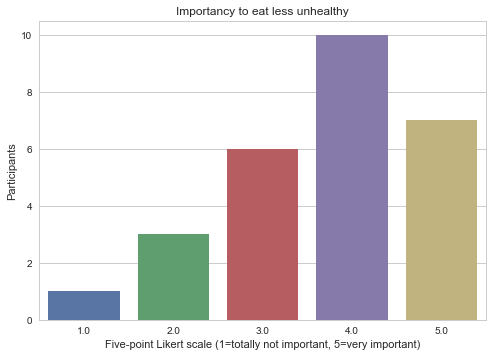

In [101]:
freq_endmot1 = df_final.endF_mot1.value_counts()
ax = sns.barplot(x=freq_endmot1.index, y=freq_endmot1)
ax.set(xlabel='Five-point Likert scale (1=totally not important, 5=very important)', ylabel='Participants', title='Importancy to eat less unhealthy')

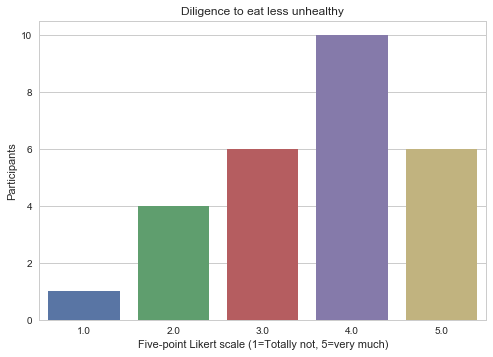

In [102]:
freq_endmot2 = df_final.endF_mot2.value_counts()
ax = sns.barplot(x=freq_endmot2.index, y=freq_endmot2)
ax.set(xlabel='Five-point Likert scale (1=Totally not, 5=very much)', ylabel='Participants', title='Diligence to eat less unhealthy')

## User exerpience

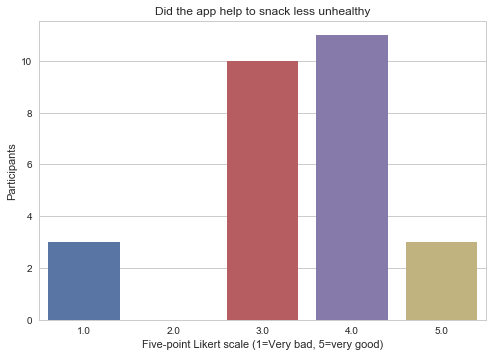

In [103]:
freq_apphulp = df_final.endG_appHulp.value_counts()
xvalues = dict(freq_apphulp)
xvalues[2.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Five-point Likert scale (1=Very bad, 5=very good)', ylabel='Participants', title='Did the app help to snack less unhealthy')

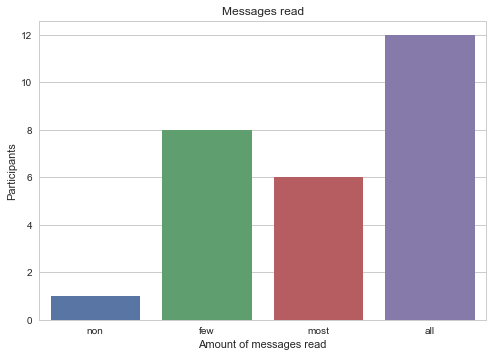

In [104]:
freq_appber = df_final.endG_appBer.value_counts()
ax = sns.barplot(x=freq_appber.index, y=freq_appber)
ax.set(xlabel='Amount of messages read', ylabel='Participants', title='Messages read')
ax.set_xticklabels(['non', 'few', 'most', 'all'])

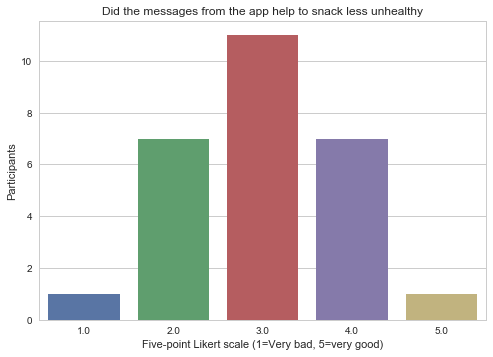

In [105]:
freq_apptips = df_final.endG_appTips.value_counts()
ax = sns.barplot(x=freq_apptips.index, y=freq_apptips)
ax.set(xlabel='Five-point Likert scale (1=Very bad, 5=very good)', ylabel='Participants', title='Did the messages from the app help to snack less unhealthy')

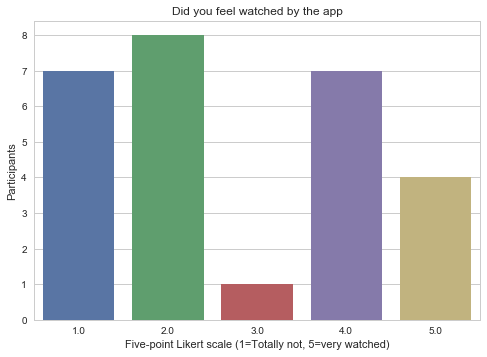

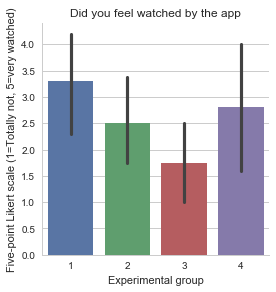

In [106]:
freq_appcont = df_final.endG_appCont.value_counts()
ax = sns.barplot(x=freq_appcont.index, y=freq_appcont)
ax.set(xlabel='Five-point Likert scale (1=Totally not, 5=very watched)', ylabel='Participants', title='Did you feel watched by the app')

g = sns.factorplot(x='controlGroup', y='endG_appCont', data=df_new, kind="bar")
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=Totally not, 5=very watched)', title='Did you feel watched by the app')

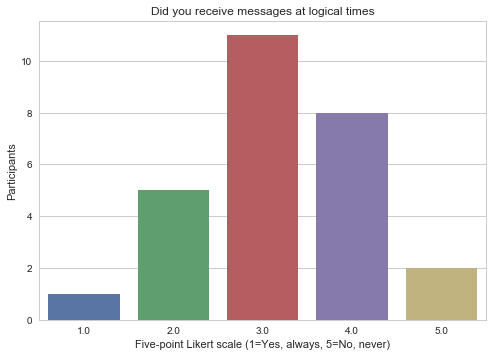

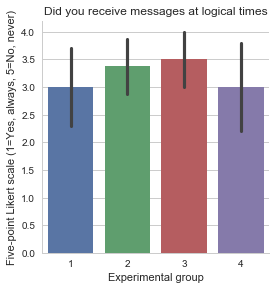

In [107]:
freq_applog = df_final.endG_appLog.value_counts()
ax = sns.barplot(x=freq_applog.index, y=freq_applog)
ax.set(xlabel='Five-point Likert scale (1=Yes, always, 5=No, never)', ylabel='Participants', title='Did you receive messages at logical times')

g = sns.factorplot(x='controlGroup', y='endG_appLog', data=df_new, kind="bar")
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=Yes, always, 5=No, never)', title='Did you receive messages at logical times')

In [116]:
mean_crash = np.sum(df_final['endG_appCrash'])
print mean_crash

20.0


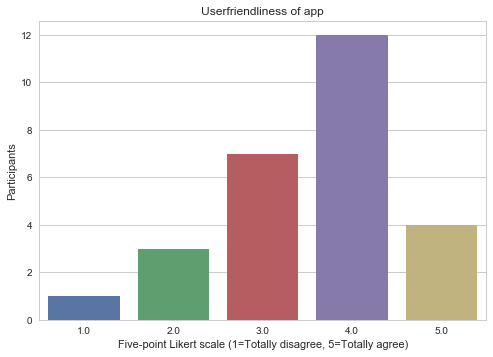

In [109]:
freq_userfriend = df_final.endG_userFriend.value_counts()
ax = sns.barplot(x=freq_userfriend.index, y=freq_userfriend)
ax.set(xlabel='Five-point Likert scale (1=Totally disagree, 5=Totally agree)', ylabel='Participants', title='Userfriendliness of app')

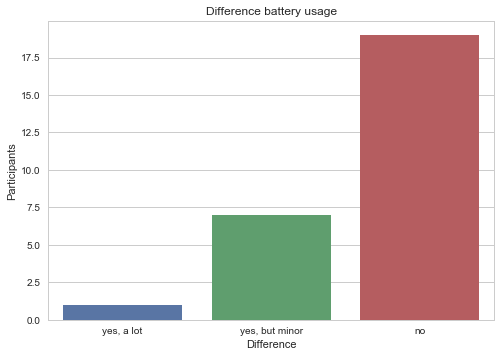

In [110]:
freq_batt = df_final.endG_batt.value_counts()
ax = sns.barplot(x=freq_batt.index, y=freq_batt)
ax.set(xlabel='Difference', ylabel='Participants', title='Difference battery usage')
ax.set_xticklabels(['yes, a lot', 'yes, but minor', 'no'])

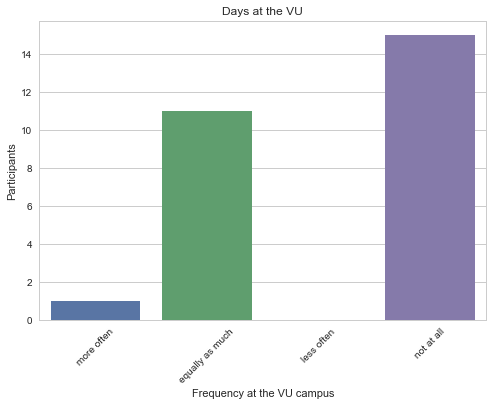

In [111]:
freq_VU = df_final.endH_dagVU.value_counts()
xvalues = dict(freq_VU)
xvalues[3.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Frequency at the VU campus', ylabel='Participants', title='Days at the VU')
ax.set_xticklabels(['more often', 'equally as much', 'less often', 'not at all'], rotation=45)

In [112]:
freq_ziek = df_final.endH_ziek.value_counts()
print freq_ziek

0.0    25
1.0     2
Name: endH_ziek, dtype: int64
